This is a single cell RNA seq sample from immortalized B cells. I will be evaluating individual cells in this dataset. Single cell RNA sequencing allows us the ability to identify unique cell subpopulations, and their changes over the course and development of disease states.

In this dataset the rows are genes and the features are cells.
In this project we want to compare multiple subpopulations of B cells to one another. I am comparing B cells in the control group, then later in the project I will analyze the stimulated group. The control group is unstimulated, and whereas the stimulated experimental group has exposure to a cytokine mixture (IL-4, IL-6, IL-21, CD40L). I will be using unsupervised modeling techniques on both groups/datasets. Note, both datasets were already cleaned using R Seurat V3.0 package by the lab responsible for supplying me with this single cell RNA seq data at the University of Alabama Birmingham, United States.

Because we are using one cell type, B cells, this dataset demonstrates a lot of similarity between observations, thus we cannot separate lots of cell types at one time.





In [ ]:
import pandas as pd

from scipy import stats
import numpy as np 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans #k-means model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import math


from sklearn.model_selection import train_test_split
from sklearn import metrics #evaluating clusters

from scipy.cluster.hierarchy import dendrogram, linkage #hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN #DBSCAN clustering model

from matplotlib.patches import Ellipse #clustering with GMM model (gaussan mixture model)
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA #dimensionality reduction with PCA

from sklearn.manifold import TSNE #dimensionality reduction with t-SNE
import time

from sklearn.ensemble import IsolationForest #outlier detection

!pip install umap-learn #dimensionality reduction with UMAP
import umap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Unstimulated Cytokine B Cell Dataset

In [ ]:
 
from google.colab import drive
drive.mount('/content/drive')

transcribeg_df = pd.read_csv('/content/drive/My Drive/DS projects and datasets/-------.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Feature Evaluation

In [ ]:
transcribeg_df

,GeneID,AAACCTGAGAGGTACC,AAACCTGAGCACGCCT,AAACCTGTCCGTCATC,AAACCTGTCGCTTGTC,AAACGGGAGGGCTTCC,AAACGGGCAGGAACGT,AAACGGGGTGCACTTA,AAAGATGAGTTAGCGG,AAAGATGCACAGATTC,AAAGATGCAGCCTGTG,AAAGATGCAGGGTATG,AAAGATGGTAAACCTC,AAAGATGGTGTGCGTC,AAAGATGTCAGTTGAC,AAAGATGTCCCTCTTT,AAAGATGTCCGGGTGT,AAAGATGTCGGCCGAT,AAAGATGTCGTGACAT,AAAGCAAAGAGTCGGT,AAAGCAACAGATCGGA,AAAGCAAGTACCATCA,AAAGCAAGTATATCCG,AAAGCAAGTGCGGTAA,AAAGCAATCTGCTTGC,AAAGCAATCTGGCGTG,AAAGTAGAGTCGTACT,AAAGTAGCAAACAACA,AAAGTAGCACCGTTGG,AAAGTAGCAGCTGTTA,AAAGTAGGTAGCCTAT,AAAGTAGGTAGCGTAG,AAAGTAGGTCTCCACT,AAAGTAGGTGTTCGAT,AAATGCCAGAGTACAT,AAATGCCAGAGTCTGG,AAATGCCAGTAACCCT,AAATGCCAGTGACATA,AAATGCCCACTTGGAT,AAATGCCCAGACAAAT,...,TTTACTGCATGCATGT,TTTACTGGTGATGCCC,TTTACTGTCTCGTTTA,TTTATGCAGAAGGACA,TTTATGCCATGGATGG,TTTATGCGTCCGTGAC,TTTATGCTCGTCTGAA,TTTCCTCAGAAACGAG,TTTCCTCCAATACGCT,TTTCCTCCACATTTCT,TTTCCTCCAGTCAGCC,TTTCCTCCATCCGTGG,TTTCCTCCATGCCTTC,TTTCCTCGTCGTCTTC,TTTGCGCAGACAAGCC,TTTGCGCAGTAACCCT,TTTGCGCCAAAGGAAG,TTTGCGCCAGTAAGCG,TTTGCGCCATCCGGGT,TTTGCGCGTCAATACC,TTTGCGCGTCATCCCT,TTTGCGCGTCCGAACC,TTTGCGCGTCTGATTG,TTTGCGCGTTCTCATT,TTTGCGCTCCGCAAGC,TTTGCGCTCTCGTATT,TTTGGTTAGTACATGA,TTTGGTTCACATAACC,TTTGGTTCACCGAATT,TTTGGTTGTTAAGAAC,TTTGGTTTCGAGGTAG,TTTGTCAAGCCCAATT,TTTGTCACACCACCAG,TTTGTCACATCGGACC,TTTGTCAGTCAAAGCG,TTTGTCAGTTAAAGAC,TTTGTCAGTTACGGAG,TTTGTCATCAAGCCTA,TTTGTCATCAGCAACT,TTTGTCATCGCCGTGA
0,AL627309.1,0.869619,0.526503,3.534096,0.526503,0.526503,0.526503,1.878549,0.526503,0.869619,0.526503,0.869619,1.327606,0.526503,0.526503,1.327606,0.526503,1.878549,0.526503,1.327606,1.124606,1.496270,0.526503,0.869619,0.526503,1.124606,0.526503,0.526503,0.526503,0.526503,0.526503,0.526503,0.526503,1.327606,0.526503,0.869619,0.526503,0.869619,4.319500,0.526503,...,0.530130,0.874764,0.874764,0.874764,0.874764,0.530130,3.807700,0.530130,0.530130,0.530130,1.130583,0.530130,1.334110,1.647682,0.874764,0.530130,0.530130,0.530130,0.530130,0.530130,0.530130,0.530130,1.130583,0.874764,1.130583,1.130583,2.659135,0.530130,0.530130,0.530130,0.530130,0.530130,0.530130,0.530130,0.874764,0.530130,0.530130,3.316650,1.773948,0.874764
1,AP006222.1,0.530130,1.130583,0.874764,0.530130,1.130583,3.896739,1.647682,1.503137,0.530130,0.530130,1.130583,1.334110,1.334110,0.530130,0.530130,0.530130,1.986831,0.530130,0.530130,0.530130,1.334110,3.480068,0.874764,0.530130,0.530130,0.530130,0.530130,0.874764,0.530130,0.530130,1.130583,0.530130,0.530130,0.530130,0.530130,0.874764,0.530130,0.530130,0.874764,...,0.505157,1.598069,1.089147,0.505157,1.722896,0.839190,1.722896,1.089147,1.089147,0.505157,0.505157,0.505157,0.839190,0.505157,0.505157,2.998735,1.833856,0.839190,0.505157,2.024518,0.505157,0.839190,0.505157,2.738218,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,1.455408,0.505157
2,AL732372.2,0.505157,0.505157,0.505157,0.505157,0.505157,1.722896,0.505157,1.089147,2.184584,1.089147,1.089147,1.288953,0.839190,0.839190,1.933724,0.505157,0.505157,0.505157,0.505157,0.505157,0.505157,1.598069,0.505157,0.839190,0.505157,0.839190,0.505157,0.505157,1.288953,0.505157,0.505157,0.505157,0.839190,1.089147,0.505157,1.089147,0.839190,0.505157,0.505157,...,0.656700,1.331114,0.656700,1.882592,1.730255,0.656700,1.049715,1.331114,0.656700,0.656700,0.656700,1.049715,1.730255,0.656700,0.656700,0.656700,1.550468,0.656700,1.049715,1.331114,0.656700,0.656700,1.882592,1.049715,1.049715,0.656700,0.656700,1.550468,0.656700,2.417039,0.656700,0.656700,2.496590,1.049715,0.656700,1.331114,1.550468,0.656700,0.656700,0.656700
3,AL669831.3,0.656700,0.656700,0.656700,0.656700,0.656700,1.331114,2.131483,0.656700,2.417039,0.656700,0.656700,0.656700,0.656700,1.049715,3.393870,0.656700,3.393870,0.656700,0.656700,0.656700,0.656700,0.656700,0.656700,1.049715,0.656700,1.331114,0.656700,1.049715,0.656700,1.049715,1.331114,1.331114,2.330608,0.656700,2.925308,1.550468,0.656700,0.656700,3.147683,...,1.059489,0.813858,4.595267,3.286917,0.487536,0.487536,1.256526,1.256526,1.895321,0.487536,0.8

In [ ]:
transcribeg_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18562 entries, 0 to 18561
Columns: 3092 entries, GeneID to TTTGTCATCGCCGTGA
dtypes: float64(3091), object(1)
memory usage: 437.9+ MB




> 3,092 columns and 18,562 observations



In [ ]:
transcribeg_df.describe()

,AAACCTGAGAGGTACC,AAACCTGAGCACGCCT,AAACCTGTCCGTCATC,AAACCTGTCGCTTGTC,AAACGGGAGGGCTTCC,AAACGGGCAGGAACGT,AAACGGGGTGCACTTA,AAAGATGAGTTAGCGG,AAAGATGCACAGATTC,AAAGATGCAGCCTGTG,AAAGATGCAGGGTATG,AAAGATGGTAAACCTC,AAAGATGGTGTGCGTC,AAAGATGTCAGTTGAC,AAAGATGTCCCTCTTT,AAAGATGTCCGGGTGT,AAAGATGTCGGCCGAT,AAAGATGTCGTGACAT,AAAGCAAAGAGTCGGT,AAAGCAACAGATCGGA,AAAGCAAGTACCATCA,AAAGCAAGTATATCCG,AAAGCAAGTGCGGTAA,AAAGCAATCTGCTTGC,AAAGCAATCTGGCGTG,AAAGTAGAGTCGTACT,AAAGTAGCAAACAACA,AAAGTAGCACCGTTGG,AAAGTAGCAGCTGTTA,AAAGTAGGTAGCCTAT,AAAGTAGGTAGCGTAG,AAAGTAGGTCTCCACT,AAAGTAGGTGTTCGAT,AAATGCCAGAGTACAT,AAATGCCAGAGTCTGG,AAATGCCAGTAACCCT,AAATGCCAGTGACATA,AAATGCCCACTTGGAT,AAATGCCCAGACAAAT,AAATGCCCAGACGCCT,...,TTTACTGCATGCATGT,TTTACTGGTGATGCCC,TTTACTGTCTCGTTTA,TTTATGCAGAAGGACA,TTTATGCCATGGATGG,TTTATGCGTCCGTGAC,TTTATGCTCGTCTGAA,TTTCCTCAGAAACGAG,TTTCCTCCAATACGCT,TTTCCTCCACATTTCT,TTTCCTCCAGTCAGCC,TTTCCTCCATCCGTGG,TTTCCTCCATGCCTTC,TTTCCTCGTCGTCTTC,TTTGCGCAGACAAGCC,TTTGCGCAGTAACCCT,TTTGCGCCAAAGGAAG,TTTGCGCCAGTAAGCG,TTTGCGCCATCCGGGT,TTTGCGCGTCAATACC,TTTGCGCGTCATCCCT,TTTGCGCGTCCGAACC,TTTGCGCGTCTGATTG,TTTGCGCGTTCTCATT,TTTGCGCTCCGCAAGC,TTTGCGCTCTCGTATT,TTTGGTTAGTACATGA,TTTGGTTCACATAACC,TTTGGTTCACCGAATT,TTTGGTTGTTAAGAAC,TTTGGTTTCGAGGTAG,TTTGTCAAGCCCAATT,TTTGTCACACCACCAG,TTTGTCACATCGGACC,TTTGTCAGTCAAAGCG,TTTGTCAGTTAAAGAC,TTTGTCAGTTACGGAG,TTTGTCATCAAGCCTA,TTTGTCATCAGCAACT,TTTGTCATCGCCGTGA
count,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,...,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000
mean,0.927289,0.933750,0.924611,0.936181,0.922867,0.927450,0.932698,0.929326,0.934808,0.933620,0.925416,0.921949,0.912544,0.931038,0.929962,0.935222,0.936263,0.934678,0.921812,0.915708,0.928954,0.928761,0.927469,0.929196,0.926329,0.931417,0.935015,0.926728,0.926737,0.931383,0.932861,0.929014,0.928339,0.918531,0.924103,0.934078,0.936862,0.933073,0.935914,0.927432,...,0.937056,0.925938,0.933128,0.923857,0.935924,0.929985,0.934569,0.940861,0.931286,0.922531,0.922534,0.920469,0.929664,0.934349,0.938847,0.932236,0.932477,0.913627,0.913202,0.924682,0.931336,0.916148,0.927623,0.935413,0.929074,0.931018,0.931938,0.923533,0.927683,0.930535,0.930684,0.935380,0.912950,0.929324,0.929451,0.932249,0.931706,0.932090,0.920492,0.935784
std,0.757359,0.774466,0.753967,0.772807,0.753544,0.757221,0.766904,0.759330,0.763383,0.767729,0.756717,0.747524,0.740425,0.771638,0.762234,0.773628,0.772006,0.768699,0.753846,0.746815,0.759695,0.760638,0.762477,0.762332,0.751931,0.762190,0.766937,0.752704,0.758194,0.764248,0.769873,0.756612,0.762650,0.753721,0.751739,0.763577,0.769916,0.763135,0.770316,0.765319,...,0.768483,0.757332,0.769555,0.749969,0.768326,0.763508,0.767349,0.770888,0.760765,0.757205,0.753205,0.750515,0.756185,0.767927,0.781255,0.770904,0.769324,0.742417,0.740504,0.749062,0.759690,0.744973,0.758932,0.766868,0.767232,0.764747,0.761491,0.759266,0.758637,0.772037,0.758597,0.768413,0.743011,0.758467,0.756735,0.763163,0.764527,0.769312,0.753705,0.775589
min,0.268743,0.268743,0.268743,0.268743,0.268743,0.268743,0.268743,0.268743,0.268743,0.268743,0.268743,0.268743,0.268743,0.26874



> Here we can see the min/max and mean of all rna gene samples a mean of 0.9 a max of 7 and a min of 0.2 



Cleaning phase: 

Please note this dadaset has already been cleaned and normalized. The only change i will make in this cleaning phase is dummifying the gene id so i can run my models.



In [ ]:
#dummify gene name

transcribeg_df['GeneID'] = pd.get_dummies(transcribeg_df["GeneID"])

In [ ]:
print(transcribeg_df['GeneID'])

0        0
1        0
2        0
3        0
4        0
        ..
18557    0
18558    0
18559    0
18560    0
18561    0
Name: GeneID, Length: 18562, dtype: uint8


Modeling Phase:

Let's begin with K-Means Clustering Model

In [ ]:
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(transcribeg_df)
pred = k_means.predict(transcribeg_df)

1 loop, best of 3: 29 s per loop


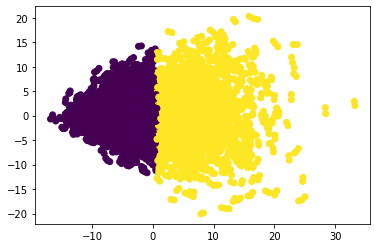

In [ ]:
pca = PCA(n_components=2).fit_transform(transcribeg_df) 

plt.scatter(pca[:, 0], pca[:, 1], c=pred)
plt.show() 



> We see really great definition between the two clusters



Let's try mini batch k means as well

In [ ]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_batch_k_means.fit(transcribeg_df)
pred_mini = mini_batch_k_means.predict(transcribeg_df)


1 loop, best of 3: 1.31 s per loop


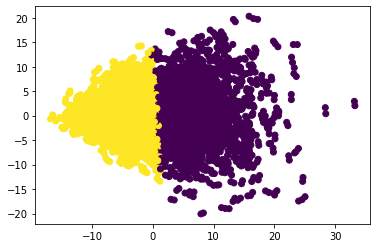

In [ ]:
pca = PCA(n_components=2).fit_transform(transcribeg_df) 

plt.scatter(pca[:,0], pca[:,1], c=pred_mini)
plt.show()




> similar definition for the mini batch



In [ ]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(transcribeg_df)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(transcribeg_df)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(transcribeg_df)

print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(transcribeg_df, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(transcribeg_df, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(transcribeg_df, pred_4, metric='euclidean')))

Silhouette score for two cluster k-means: 0.015100932604814363
Silhouette score for three cluster k-means: 0.00035482347984371954
Silhouette score for four cluster k-means: 0.0005762270499572441


This model does not perform well, out of all the options though 2 cluster performs best, let's evaluate that sample. Please note, I did experiment with larger cluster samples, 6,8,9 and found the silhouette score dropped into the negative so I am keeping with the 2,3,4 samples. 

In [ ]:
transcribeg_df['predict_clusters'] = pred_2

In [ ]:
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

transcribeg_df.groupby('predict_clusters').describe()


GeneID                                              \
                    count      mean      std  min  25%  50%  75%  max   
predict_clusters                                                        
0                 10829.0  0.000092  0.00961  0.0  0.0  0.0  0.0  1.0   
1                  7733.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   

                 AAACCTGAGAGGTACC                                          \
                            count      mean       std       min       25%   
predict_clusters                                                            
0                         10829.0  0.888240  0.748486  0.268743  0.445858   
1                          7733.0  0.981971  0.766324  0.268743  0.538997   

                                               AAACCTGAGCACGCCT            \
                       50%       75%       max            count      mean   
predict_clusters                                                            
0                 0.604361  1.018552  6.080280          10829.0  0.894650   
1                 0.686955  1.110849  6.283808           7733.0  0.988506   

                                                                              \
                       std       min       25%       50%       75%       max   
predict_clusters                                                               
0                 0.772234  0.268743  0.445555  0.599914  1.024047  7.360684   
1                 0.774318  0.268743  0.538997  0.687495  1.119160  6.635630   

                 AAACCTGTCCGTCATC                                          \
                            count      mean       std       min       25%   
predict_clusters                                                            
0                         10829.0  0.880853  0.744998  0.268743  0.445293   
1                          7733.0  0.985888  0.762187  0.268743  0.539086   

                                               AAACCTGTCGCTTGTC            \
                       50%       75%       max            count      mean   
predict_clusters                                                            
0                 0.594769  1.012971  6.104388          10829.0  0.889090   
1                 0.684608  1.124512  6.198505           7733.0  1.002125   

                                                                             \
                       std       min       25%      50%       75%       max   
predict_clusters                                                              
0                 0.751668  0.268743  0.445514  0.60036  1.024848  5.723681   
1                 0.796857  0.268743  0.542592  0.69170  1.117289  7.084939   

                 AAACGGGAGGGCTTCC                                          \
                            count      mean       std       min       25%   
predict_clusters                                                            
0                         10829.0  0.881227  0.742792  0.268743  0.444106   
1                          7733.0  0.981178  0.764592  0.268743  0.539205   

                                               AAACGGGCAGGAACGT            \
                       50%       75%       max            count      mean   
predict_clusters                                                            
0                 0.594769  1.017122  6.884585          10829.0  0.890918   
1                 0.679819  1.110940  6.805626           7733.0  0.978610   

                                                                              \
                       std       min       25%       50%       75%       max   
predict_clusters                                                               
0                 0.759684  0.268743  0.446647  0.608150  1.011076  6.576818   
1                 0.750825  0.268743  0.539175  0.686661  1.117842  6.464294   

                 AAACGGGGTGCACTTA                                          \
                            count      mean       std       mi

We do not see a lot of dissimilarity between the means in sample 0 and sample 1.

There is little to no discrepency between the two samples, which is to 
be expected given that our observations are all b cells and very similar to 
one another. 

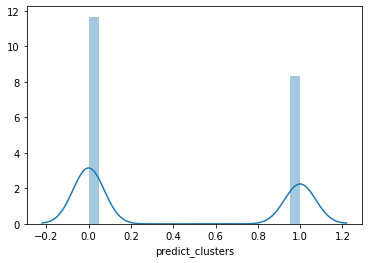

In [ ]:
ax = sns.distplot(transcribeg_df['predict_clusters'], bins=20)

The scores however for this model are very poor and all three of them hover around 0 so I will continue with a few other clustering models. 

Hierarchical Clustering

In [ ]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(transcribeg_df)

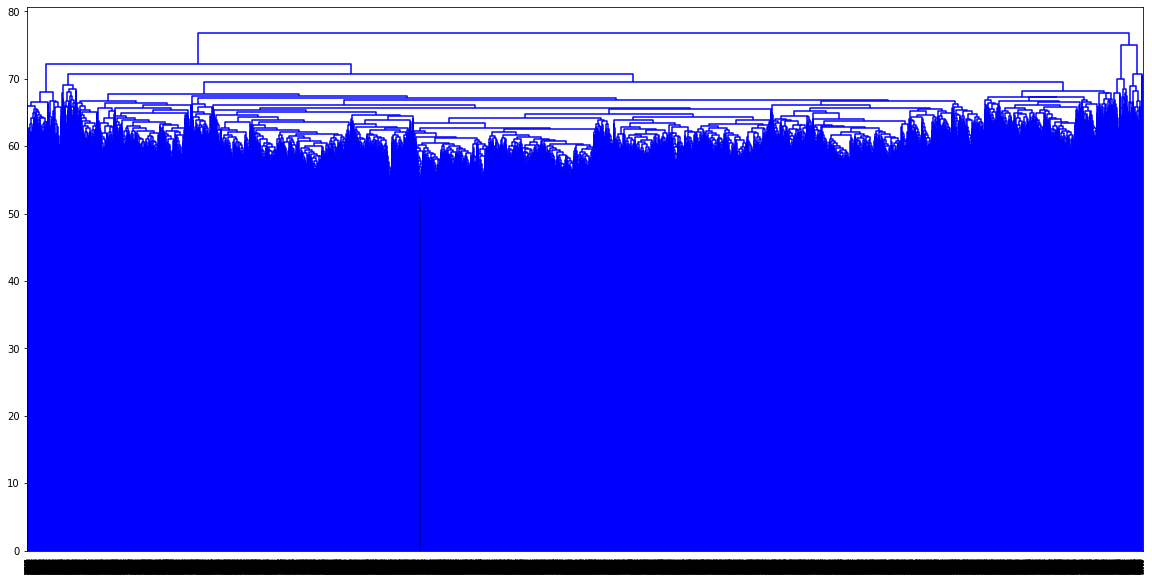

In [ ]:
#let's experiment with a few different types of dengrograms, see which one is best and then run our ARI and silhouette scores

plt.figure(figsize=(20,10))
dendrogram(linkage(transcribeg_df, method='complete')) #complete method
plt.show()

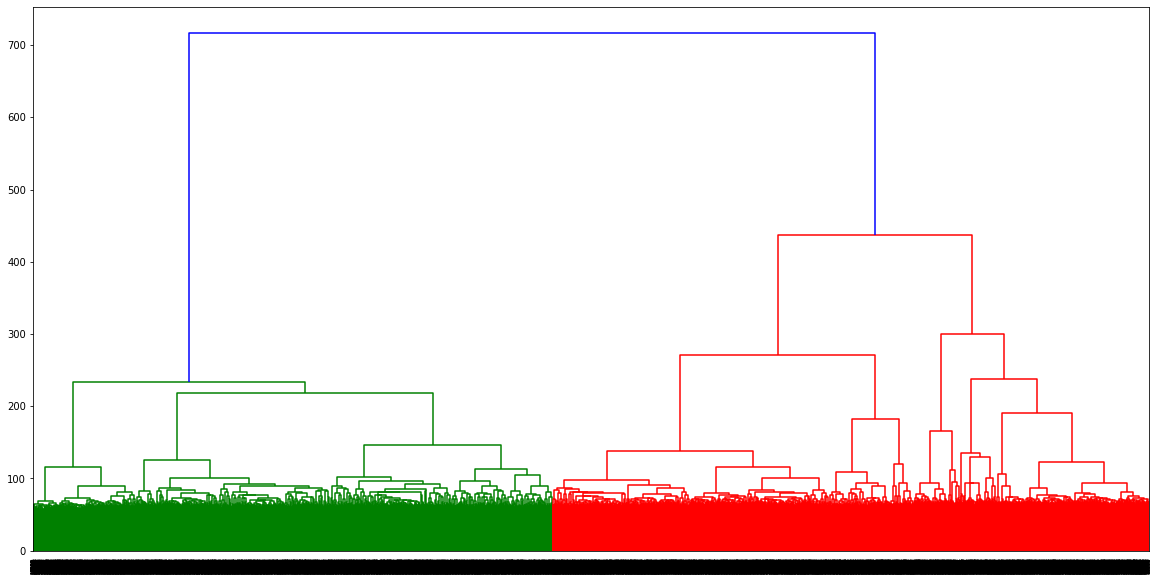

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(transcribeg_df, method='ward')) #ward method
plt.show() #what does linkage mean?

The ward linkage method performed best within the hierarchical model, let's calculate the sihouette score for both complete and ward methods

In [ ]:
linkage_methods = ["ward", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(transcribeg_df)

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(transcribeg_df, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(transcribeg_df)

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(transcribeg_df, clusters, metric='euclidean'))) 

#check to see what the general benchmark silhouette score is in the curriculum for kmeans and hierarchical 

Silhouette score of linkage method complete: 0.008777519987643305
------------------------------------------------
Silhouette score of linkage method ward: 0.006296282577740384


Evaluation: 

Because we are using one cell type, b cells, this dataset demonstrates a lot of similarity between observations. and we can seperate lots of cell types at one time.

GMM Clustering Model

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(transcribeg_df)

print("Silhouette score: {}".format(
    metrics.silhouette_score(transcribeg_df, clusters, metric='euclidean')))

Silhouette score: 0.01523430019591807


Let's apply different covaraiance types to see if there's an impact

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(transcribeg_df)


print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(transcribeg_df, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(transcribeg_df)

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(transcribeg_df, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(transcribeg_df)

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(transcribeg_df, clusters, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(transcribeg_df)

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(transcribeg_df, clusters, metric='euclidean')))
print("------------------------------------------------------")

Silhouette score with covariance_type=full: 0.01523430019591807
------------------------------------------------------
Silhouette score with covariance_type=tied: 0.01523430019591807
------------------------------------------------------
Silhouette score with covariance_type=diag: 0.01523430019591807
------------------------------------------------------
Silhouette score with covariance_type=spherical: 0.015009328996430229
------------------------------------------------------


Cytokine Stimulated B Cell Dataset

In [ ]:
 
from google.colab import drive
drive.mount('/content/drive')

cytotrans_df = pd.read_csv('/content/drive/My Drive/DS projects and datasets/Gene Expression/----.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Evaluation

In [ ]:
cytotrans_df

,Gene,AAACCTGAGTGATCGG,AAACCTGGTCCCTTGT,AAACCTGTCACCTCGT,AAACCTGTCAGGCGAA,AAACCTGTCTAACTTC,AAACCTGTCTTGGGTA,AAACGGGAGGATATAC,AAACGGGCAAGCTGTT,AAACGGGCACACGCTG,AAACGGGGTTCCAACA,AAACGGGGTTCTGTTT,AAACGGGTCCTTTCGG,AAACGGGTCGCATGGC,AAAGATGGTGCACTTA,AAAGATGGTGTCTGAT,AAAGATGGTTATCCGA,AAAGATGTCAGTTTGG,AAAGATGTCCCTTGCA,AAAGCAAAGCTGGAAC,AAAGCAACACCTGGTG,AAAGCAACATCGATTG,AAAGCAACATTGCGGC,AAAGCAAGTCTGATTG,AAAGCAAGTGTGGCTC,AAAGCAAGTTGAGTTC,AAAGCAATCACCACCT,AAAGCAATCTCTAAGG,AAAGTAGAGCGTTGCC,AAAGTAGAGTACGCCC,AAAGTAGCACAACGTT,AAAGTAGCAGTTCATG,AAAGTAGTCTCCCTGA,AAATGCCAGCTTCGCG,AAATGCCCAGTACACT,AAATGCCGTAAATACG,AAATGCCGTCGCGTGT,AAATGCCGTGTGCCTG,AAATGCCGTTGCGTTA,AAATGCCTCTCAACTT,...,TTTACTGCACCATCCT,TTTACTGCACGACGAA,TTTACTGCACGGTTTA,TTTACTGCAGAGTGTG,TTTACTGCAGCCAATT,TTTACTGGTTTAGCTG,TTTACTGTCGCGTTTC,TTTACTGTCTCCAGGG,TTTATGCAGAATAGGG,TTTATGCCACTTACGA,TTTATGCGTAGCGTCC,TTTATGCGTGGTTTCA,TTTATGCTCCGCTGTT,TTTATGCTCGACGGAA,TTTATGCTCTTGCCGT,TTTCCTCAGAGACGAA,TTTCCTCAGCCTTGAT,TTTCCTCCAAATCCGT,TTTCCTCGTTAGATGA,TTTCCTCGTTTACTCT,TTTCCTCTCGTGTAGT,TTTGCGCAGATAGTCA,TTTGCGCAGGACAGCT,TTTGCGCAGGCCCTTG,TTTGCGCCATTCTTAC,TTTGCGCGTCCAAGTT,TTTGCGCGTTCGTCTC,TTTGCGCTCTGCAGTA,TTTGGTTCAAACCTAC,TTTGGTTCACTTAACG,TTTGGTTGTCCTCCAT,TTTGGTTTCCCTCAGT,TTTGGTTTCTCTTATG,TTTGGTTTCTGGCGTG,TTTGTCAAGTGTCCAT,TTTGTCAGTAGCTTGT,TTTGTCAGTCGACTAT,TTTGTCAGTCTCCATC,TTTGTCAGTTAAGGGC,TTTGTCATCATCTGCC
0,AL627309.1,0.476036,3.505952,1.959646,1.039939,0.797220,1.235101,1.235101,2.532422,0.476036,0.797220,2.317003,0.476036,1.869821,0.476036,0.476036,1.039939,0.476036,0.476036,0.476036,0.476036,0.476036,0.797220,0.476036,0.476036,0.476036,1.398324,0.476036,1.661608,1.039939,0.476036,1.235101,0.476036,0.476036,4.238219,0.476036,0.797220,0.797220,0.797220,1.039939,...,0.371148,0.641220,0.371148,0.371148,0.371148,1.028759,0.371148,0.371148,0.371148,0.641220,0.641220,0.853646,1.703653,0.371148,0.371148,1.177728,0.371148,2.255342,0.371148,0.371148,0.371148,0.641220,1.307356,0.371148,0.371148,0.371148,0.371148,0.641220,0.371148,0.371148,0.371148,0.371148,0.641220,1.986719,1.177728,0.371148,0.371148,1.177728,0.371148,0.853646
1,AL627309.5,1.525008,0.371148,0.371148,0.371148,0.371148,0.371148,0.371148,0.371148,0.641220,0.641220,0.641220,1.307356,0.371148,0.371148,0.371148,0.371148,1.618314,1.028759,0.641220,0.371148,0.641220,3.797545,1.177728,0.371148,0.641220,0.371148,0.641220,0.371148,0.853646,0.641220,0.371148,0.641220,0.371148,1.028759,0.371148,1.028759,0.371148,0.641220,2.046527,...,1.164583,1.785124,0.975857,0.438994,0.438994,0.438994,0.438994,0.438994,0.975857,0.975857,0.975857,0.438994,0.743029,0.438994,0.438994,0.975857,0.743029,0.438994,0.743029,0.743029,0.438994,0.743029,0.438994,4.093889,1.164583,1.164583,1.164583,0.975857,1.323283,0.438994,0.438994,1.460213,0.743029,0.438994,0.438994,0.438994,0.438994,1.785124,0.438994,0.743029
2,AP006222.1,0.438994,1.460213,0.438994,0.975857,0.438994,0.438994,0.438994,1.164583,0.743029,0.438994,1.164583,0.438994,1.954815,0.438994,0.438994,0.743029,0.975857,0.438994,0.438994,0.438994,0.438994,1.873564,0.743029,0.975857,1.164583,0.438994,3.977041,0.438994,0.438994,0.438994,0.743029,0.743029,0.438994,0.438994,0.743029,0.438994,0.743029,0.438994,1.323283,...,0.702973,0.518694,0.858520,0.292607,0.292607,1.481414,0.702973,0.518694,0.518694,0.292607,1.481414,0.858520,2.096574,0.292607,0.993097,1.217703,0.292607,0.292607,1.111692,0.518694,1.217703,1.217703,0.292607,0.702973,1.313544,0.292607,0.518694,0.292607,0.993097,0.292607,1.313544,1.217703,0.292607,0.518694,1.217703,0.993097,0.292607,0.292607,0.518694,1.111692
3,AL732372.2,1.913767,1.313544,0.292607,0.518694,2.286235,0.292607,0.292607,0.518694,0.292607,0.993097,0.993097,0.292607,2.703813,0.292607,1.555843,0.993097,0.292607,0.518694,0.292607,0.292607,0.518694,0.993097,0.292607,0.858520,1.808083,0.292607,0.518694,2.176804,0.518694,0.292607,1.111692,0.292607,1.217703,0.292607,0.518694,0.518694,0.702973,0.518694,0.702973,...,0.292607,0.292607,0.292607,0.292607,0.292607,0.518694,0.292607,1.111692,0.702973,0.518694,1.313

In [ ]:
cytotrans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18676 entries, 0 to 18675
Columns: 3244 entries, Gene to TTTGTCATCATCTGCC
dtypes: float64(3243), object(1)
memory usage: 462.2+ MB


In [ ]:
cytotrans_df.describe()


,AAACCTGAGTGATCGG,AAACCTGGTCCCTTGT,AAACCTGTCACCTCGT,AAACCTGTCAGGCGAA,AAACCTGTCTAACTTC,AAACCTGTCTTGGGTA,AAACGGGAGGATATAC,AAACGGGCAAGCTGTT,AAACGGGCACACGCTG,AAACGGGGTTCCAACA,AAACGGGGTTCTGTTT,AAACGGGTCCTTTCGG,AAACGGGTCGCATGGC,AAAGATGGTGCACTTA,AAAGATGGTGTCTGAT,AAAGATGGTTATCCGA,AAAGATGTCAGTTTGG,AAAGATGTCCCTTGCA,AAAGCAAAGCTGGAAC,AAAGCAACACCTGGTG,AAAGCAACATCGATTG,AAAGCAACATTGCGGC,AAAGCAAGTCTGATTG,AAAGCAAGTGTGGCTC,AAAGCAAGTTGAGTTC,AAAGCAATCACCACCT,AAAGCAATCTCTAAGG,AAAGTAGAGCGTTGCC,AAAGTAGAGTACGCCC,AAAGTAGCACAACGTT,AAAGTAGCAGTTCATG,AAAGTAGTCTCCCTGA,AAATGCCAGCTTCGCG,AAATGCCCAGTACACT,AAATGCCGTAAATACG,AAATGCCGTCGCGTGT,AAATGCCGTGTGCCTG,AAATGCCGTTGCGTTA,AAATGCCTCTCAACTT,AACACGTAGAGTGACC,...,TTTACTGCACCATCCT,TTTACTGCACGACGAA,TTTACTGCACGGTTTA,TTTACTGCAGAGTGTG,TTTACTGCAGCCAATT,TTTACTGGTTTAGCTG,TTTACTGTCGCGTTTC,TTTACTGTCTCCAGGG,TTTATGCAGAATAGGG,TTTATGCCACTTACGA,TTTATGCGTAGCGTCC,TTTATGCGTGGTTTCA,TTTATGCTCCGCTGTT,TTTATGCTCGACGGAA,TTTATGCTCTTGCCGT,TTTCCTCAGAGACGAA,TTTCCTCAGCCTTGAT,TTTCCTCCAAATCCGT,TTTCCTCGTTAGATGA,TTTCCTCGTTTACTCT,TTTCCTCTCGTGTAGT,TTTGCGCAGATAGTCA,TTTGCGCAGGACAGCT,TTTGCGCAGGCCCTTG,TTTGCGCCATTCTTAC,TTTGCGCGTCCAAGTT,TTTGCGCGTTCGTCTC,TTTGCGCTCTGCAGTA,TTTGGTTCAAACCTAC,TTTGGTTCACTTAACG,TTTGGTTGTCCTCCAT,TTTGGTTTCCCTCAGT,TTTGGTTTCTCTTATG,TTTGGTTTCTGGCGTG,TTTGTCAAGTGTCCAT,TTTGTCAGTAGCTTGT,TTTGTCAGTCGACTAT,TTTGTCAGTCTCCATC,TTTGTCAGTTAAGGGC,TTTGTCATCATCTGCC
count,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,...,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000,18676.000000
mean,0.919904,0.918497,0.925385,0.927528,0.928369,0.915477,0.930599,0.924140,0.927915,0.914570,0.910077,0.928555,0.914235,0.925902,0.919584,0.913862,0.919337,0.916690,0.914178,0.914969,0.923692,0.921429,0.922211,0.916066,0.924669,0.918390,0.919504,0.927156,0.915010,0.912587,0.918481,0.915256,0.918610,0.920982,0.919725,0.920382,0.919468,0.917307,0.930282,0.915778,...,0.918090,0.928794,0.922875,0.936303,0.925704,0.919982,0.917611,0.920848,0.922062,0.923479,0.913570,0.929235,0.917933,0.918044,0.909977,0.917456,0.917237,0.912038,0.916412,0.927697,0.919731,0.922342,0.936123,0.923986,0.924668,0.923244,0.928126,0.918138,0.921512,0.916976,0.914382,0.923402,0.914542,0.922758,0.921825,0.922852,0.923385,0.920936,0.932535,0.917372
std,0.753325,0.754860,0.764307,0.759995,0.761476,0.744457,0.772198,0.752563,0.765935,0.756923,0.735834,0.759268,0.748823,0.760147,0.760531,0.744170,0.756171,0.743954,0.747658,0.752809,0.762761,0.763176,0.761080,0.754591,0.763508,0.754180,0.752529,0.760251,0.740990,0.748106,0.749199,0.746267,0.757929,0.759544,0.758997,0.755002,0.753425,0.758046,0.767644,0.752489,...,0.754398,0.771788,0.758237,0.786148,0.767232,0.761456,0.739897,0.760267,0.760320,0.762349,0.744931,0.765106,0.755349,0.751880,0.741337,0.751745,0.755664,0.754432,0.747506,0.773616,0.753809,0.762317,0.773662,0.753987,0.768107,0.756517,0.762560,0.745871,0.755576,0.753168,0.750859,0.761666,0.753272,0.752749,0.762829,0.752112,0.754702,0.756550,0.780730,0.751192
min,0.272217,0.272217,0.272217,0.272217,0.272217,0.272217,0.272217,0.272217,0.272217,0.272217,0.272217,0.272217,0.272217,0.27221



> 18,676 genes (observations) and 3,244 cells (features) we see a similar average min and max as the last dataset, a min 0.2 and a max of 7



Cleaning Phase:

Note, this dataset has already been cleaned so I will only dummify the gene variable in order to feed our data through the models. 

In [ ]:
cytotrans_df['Gene'] = pd.get_dummies(cytotrans_df["Gene"])

In [ ]:
print(cytotrans_df['Gene'])

0        0
1        0
2        0
3        0
4        0
        ..
18671    0
18672    0
18673    0
18674    0
18675    0
Name: Gene, Length: 18676, dtype: uint8


Modeling Phase:

Starting with K-Means clustering model

In [ ]:
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(cytotrans_df)
pred = k_means.predict(cytotrans_df)

1 loop, best of 3: 26.7 s per loop


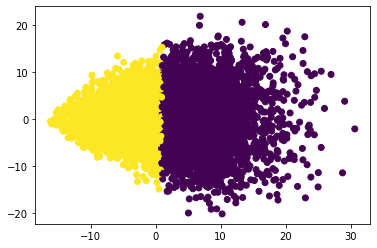

In [ ]:
pca = PCA(n_components=2).fit_transform(cytotrans_df) 

plt.scatter(pca[:, 0], pca[:, 1], c=pred)
plt.show() 



> we see excellent definition between the two clusters



Let's try k means mini batch

In [ ]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_batch_k_means.fit(cytotrans_df)
pred_mini = mini_batch_k_means.predict(cytotrans_df)


1 loop, best of 3: 1.22 s per loop


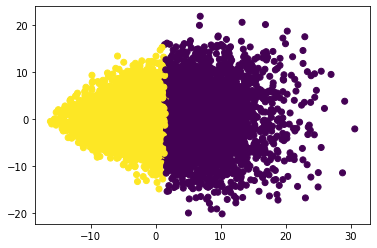

In [ ]:
pca = PCA(n_components=2).fit_transform(cytotrans_df) 

plt.scatter(pca[:,0], pca[:,1], c=pred_mini)
plt.show()




> similar clustering definition for the mini batch



Let's check the silhouette score for multiple cluster groups

In [ ]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(cytotrans_df)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(cytotrans_df)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(cytotrans_df)

print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(cytotrans_df, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(cytotrans_df, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(cytotrans_df, pred_4, metric='euclidean')))

Silhouette score for two cluster k-means: 0.016472886232079008
Silhouette score for three cluster k-means: 0.009908250057375875
Silhouette score for four cluster k-means: -0.001410089638769224


This same model performs slightly better on the intervention dataset than the control, again though the 2 cluster performs best. Let's do a short analysis. 

In [ ]:
cytotrans_df['predict_clusters'] = pred_2

In [ ]:
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

cytotrans_df.groupby('predict_clusters').describe()

#there is little to no discrepency between the two samples, which is to 
#be expected given that our observations are all b cells and very similar to 
#one another. 

Gene                                              \
                    count     mean       std  min  25%  50%  75%  max   
predict_clusters                                                        
0                  7507.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0   
1                 11169.0  0.00009  0.009462  0.0  0.0  0.0  0.0  1.0   

                 AAACCTGAGTGATCGG                                         \
                            count      mean      std       min       25%   
predict_clusters                                                           
0                          7507.0  0.977318  0.75474  0.272217  0.531747   
1                         11169.0  0.881314  0.74994  0.272217  0.438232   

                                               AAACCTGGTCCCTTGT            \
                       50%       75%       max            count      mean   
predict_clusters                                                            
0                 0.694550  1.111989  7.823822           7507.0  0.992752   
1                 0.607731  1.009078  6.523336          11169.0  0.868589   

                                                                              \
                       std       min       25%       50%       75%       max   
predict_clusters                                                               
0                 0.776338  0.272217  0.528524  0.701014  1.131905  6.148355   
1                 0.735911  0.272217  0.435652  0.598767  0.988498  6.204898   

                 AAACCTGTCACCTCGT                                          \
                            count      mean       std       min       25%   
predict_clusters                                                            
0                          7507.0  0.984145  0.762245  0.272217  0.532239   
1                         11169.0  0.885891  0.763186  0.272545  0.438408   

                                               AAACCTGTCAGGCGAA            \
                       50%       75%       max            count      mean   
predict_clusters                                                            
0                 0.694751  1.132766  6.790821           7507.0  0.987895   
1                 0.597293  1.002298  6.382144          11169.0  0.886954   

                                                                              \
                       std       min       25%       50%       75%       max   
predict_clusters                                                               
0                 0.776837  0.272217  0.528296  0.695934  1.110872  5.943609   
1                 0.745756  0.272217  0.438329  0.611025  1.030002  6.518201   

                 AAACCTGTCTAACTTC                                          \
                            count      mean       std       min       25%   
predict_clusters                                                            
0                          7507.0  0.993539  0.772054  0.292211  0.532849   
1                         11169.0  0.884566  0.751146  0.272217  0.438290   

                                              AAACCTGTCTTGGGTA            \
                      50%       75%       max            count      mean   
predict_clusters                                                           
0                 0.70263  1.136105  7.364220           7507.0  0.977475   
1                 0.60553  1.014762  6.573973          11169.0  0.873805   

                                                                              \
                       std       min       25%       50%       75%       max   
predict_clusters                                                               
0                 0.753066  0.272217  0.529843  0.693047  1.116943  6.130287   
1                 0.735719  0.272217  0.438232  0.605606  1.008119  6.444036   

                 AAACGGGAGGATATAC                                          \
                            count      mean       std       min      

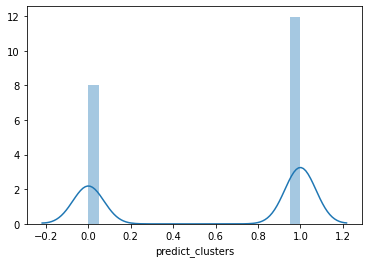

In [ ]:
ax = sns.distplot(cytotrans_df['predict_clusters'], bins=20)



> Similar to the earlier control dataset we do not see a lot of dissimilarity between the means in sample 0 and sample 1



Evaluation:

The scores for this model are very poor and all three of them hover around 0 so I will continue with a few other clustering models.

Hierarchical Clustering

In [ ]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(cytotrans_df)

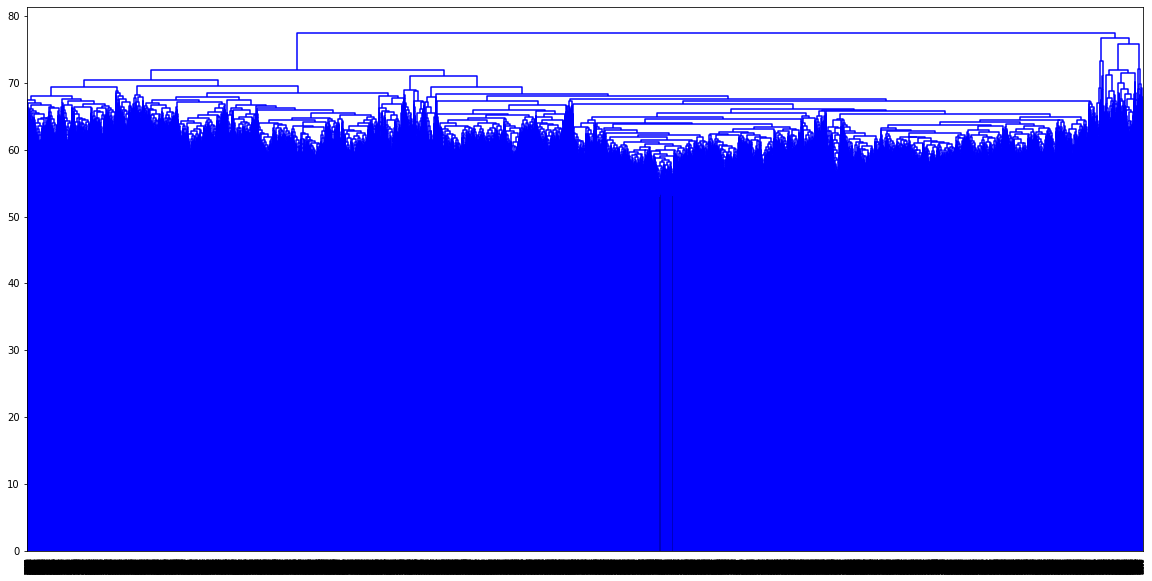

In [ ]:
#let's experiment with a few different types of dengrograms, see which one is best and then run our silhouette scores

plt.figure(figsize=(20,10))
dendrogram(linkage(cytotrans_df, method='complete')) #complete method
plt.show()

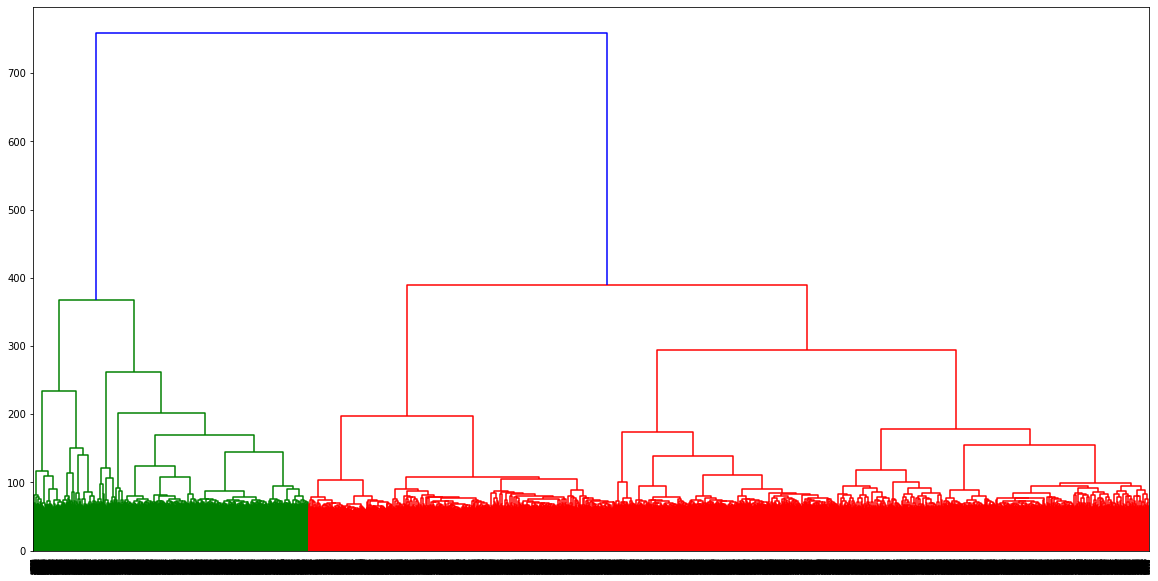

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(cytotrans_df, method='ward')) #ward method
plt.show() 

The ward linkage method performed best, let's calculate the sihouette score for both complete and ward methods

In [ ]:
linkage_methods = ["ward", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(cytotrans_df)

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(cytotrans_df, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(cytotrans_df)

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(cytotrans_df, clusters, metric='euclidean'))) 

#check to see what the general benchmark silhouette score is in the curriculum for kmeans and hierarchical 

Silhouette score of linkage method complete: -0.005208763712608054
------------------------------------------------
Silhouette score of linkage method ward: 0.024303799490186205


Evaluation:

Because we are using one cell type, B cells, this dataset demonstrates a considerable amount of similarity between observations therefore none of the models so far have performed very well. However, the hierarchical method using ward linkage has actually performed best so far. This modeling method is different in that it actually groups from the bottom up, clustering in a tiny number of groups all the way up to a large number of groups. In this scenario we are not establishing group numbers a priori to running our model. This agglomerative clustering model begins by evaluating individual observations for their similarity then combines the most similar points into a cluster, then repeating the process all the way through the rest of the dataset, combining the smaller clusters into bigger ones along the way.

We also see that the ward linkage method worked best, this method operates by looking for spherical clusters, where the clusters are cohesive inside and differentiated in comparison to other groups. It finds clusters of similar size as well, which makes sense given the semi homogynous nature of our data. 

Ultimately this model does the best job recognizing similarity between the genes in this dataset and appropriating them to the right cluster. in comparison to the ward hierarchical results from our control dataset where there was no cytokine intervention, we actually see a little bit more similarity between between our gene samples in the intervention dataset than in the control. 

GMM Clustering Model

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(cytotrans_df)

print("Silhouette score: {}".format(
    metrics.silhouette_score(cytotrans_df, clusters, metric='euclidean')))

Silhouette score: 0.016334164996253724


Let's apply different covaraiance types to see if there's an impact

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(cytotrans_df)


print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(cytotrans_df, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(cytotrans_df)

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(cytotrans_df, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(cytotrans_df)

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(cytotrans_df, clusters, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(cytotrans_df)

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(cytotrans_df, clusters, metric='euclidean')))
print("------------------------------------------------------")

Silhouette score with covariance_type=full: 0.016334164996253724
------------------------------------------------------
Silhouette score with covariance_type=tied: 0.016478315646038532
------------------------------------------------------
Silhouette score with covariance_type=diag: 0.016478315646038532
------------------------------------------------------
Silhouette score with covariance_type=spherical: 0.016490839529370735
------------------------------------------------------


With the GMM we see similar sihouette scores to the k means cluster, however, I am concluding that the best performing model remains to be hierarchical ward method clustering at 0.02